How Did US Debt get so High?

# MSPD



Analysing the "Monthly Statement of the Public Debt" [MSPD] 

(https://fiscaldata.treasury.gov/datasets/monthly-statement-public-debt/summary-of-treasury-securities-outstanding) (USD)

In [597]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime

In [598]:
%matplotlib inline

In [599]:
plt.rcParams['figure.figsize'] = (18, 8)

In [600]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [601]:
if os.path.isfile("MSPD_SumSecty_20010131_20210731.csv"):
    filepath = "MSPD_SumSecty_20010131_20210731.csv"
    print("loading from file")
else:
    filepath = "https://api.fiscaldata.treasury.gov/services/api/fiscal_service/v1/debt/mspd/mspd_table_1?sort=-record_date&format=csv&page[number]=1&page[size]=3785" 
    
    #loading using an API request with formatted URL from Gov website
    
    print("loading from the internet")

df = pd.read_csv(filepath)
print("done")

loading from the internet
done


In [602]:
# Definition of Terms
# Debt Held by Public - Federal Debt held by individuals, corporations, state or local governments, federal reserve banks, foreign governments and other entities outside of the United States Government
# Intragovernmental Holdings - Securities held by government trust funds, revolving funds and special funds.

# Bills - 4, 8, 13, 26, 52 week maturation rate sold at sub par rate, redeemed at full rate e.g sold @ $90, maturation rate 52 weeks buyback at $100, interest = 11%
# Notes - 2, 3, 5, 7 and 10 year maturation, interest paid every 6 months
# Bonds - 20, 30 year maturation - Interest every 6 months
# Treasury Inflation Protected Securities - Principal increases and deflates with CPI, when matured it pays adjusted or original principal whatever is greater. Interest twice a year at adjusted rate for inflation/deflation
# Floating Rate Note - Bond with a variable rate based on inflation, will perform better if market is volatile



In [603]:
df.head(15)

,record_date,security_type_desc,security_class_desc,debt_held_public_mil_amt,intragov_hold_mil_amt,total_mil_amt,src_line_nbr,record_fiscal_year,record_fiscal_quarter,record_calendar_year,record_calendar_quarter,record_calendar_month,record_calendar_day
0,2021-07-31,Marketable,Bills,4140792,1334,4142127,1,2021,4,2021,3,7,31
1,2021-07-31,Marketable,Notes,12176507,8519,12185026,2,2021,4,2021,3,7,31
2,2021-07-31,Marketable,Bonds,3201102,6777,3207880,3,2021,4,2021,3,7,31
3,2021-07-31,Marketable,Treasury Inflation-Protected Securities,1603247,740,1603987,4,2021,4,2021,3,7,31
4,2021-07-31,Marketable,Floating Rate Notes,553383,86,553470,5,2021,4,2021,3,7,31
5,2021-07-31,Marketable,Federal Financing Bank,0,6053,6053,6,2021,4,2021,3,7,31
6,2021-07-31,Total Marketable,_,21675033,23509,21698542,7,2021,4,2021,3,7,31
7,2021-07-31,Nonmarketable,Domestic Series,44572,0,44572,8,2021,4,2021,3,7,31
8,2021-07-31,Nonmarketable,Foreign Series,264,0,264,9,2021,4,2021,3,7,31
9,2021-07-31,Nonmarketable,State and Local Government Series,135428,0,135428,10,2021,4,2021,3,7,31


To plot this information on each date it was associated with I needed to:

1. - Set the Index --> debt_df.set_index("record_date")

2. - Select the Indexed Date and match it to the row in Security Type e.g. "Total Marketable" --> [debt_df.set_index("record_date")["security_type_desc"] == "Total Marketable"]

3. - Choose which column the number would come out of e.g Public, Government or Total --> total_mil_amt.plot

Final code: 
        debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Marketable"].total_mil_amt.plot(label="Total Marketable")

In [604]:
df.columns

Index(['record_date', 'security_type_desc', 'security_class_desc',
       'debt_held_public_mil_amt', 'intragov_hold_mil_amt', 'total_mil_amt',
       'src_line_nbr', 'record_fiscal_year', 'record_fiscal_quarter',
       'record_calendar_year', 'record_calendar_quarter',
       'record_calendar_month', 'record_calendar_day'],
      dtype='object')

In [605]:
row_one = df.iloc[1]
row_one
#row_two = marketbills_data.iloc[2]
#row_two
#row_three = marketnotes_data.iloc[3]
#row_four = marketbonds_data.iloc[4]
#row_five = markettreasury_data.iloc[5]
#row_six = marketfloating_data.iloc[6]
#row_seven = marketfed_data.iloc[7]
#row_eight = markettotal_data.iloc[8]
#row_nine = nonmarkdomestic_data[9]
#row_ten = nonmarkforeign_data.iloc[10]
#row_eleven = nonmarkstatelocal_data[11]
#row_twelve = nonmarkussavings_data[12]
#row_thirteen = nonmarkgov_data.iloc[13]
#row_fourteen = nonmarkother_data.iloc[14]
#row_fifteen = totalnonmark_data.iloc[15]
#row_sixteen = totalpublic_data.iloc[16]

record_date                 2021-07-31
security_type_desc          Marketable
security_class_desc              Notes
debt_held_public_mil_amt      12176507
intragov_hold_mil_amt             8519
total_mil_amt                 12185026
src_line_nbr                         2
record_fiscal_year                2021
record_fiscal_quarter                4
record_calendar_year              2021
record_calendar_quarter              3
record_calendar_month                7
record_calendar_day                 31
Name: 1, dtype: object

In [606]:
df['record_date']

0       2021-07-31
1       2021-07-31
2       2021-07-31
3       2021-07-31
4       2021-07-31
           ...    
3780    2001-01-31
3781    2001-01-31
3782    2001-01-31
3783    2001-01-31
3784    2001-01-31
Name: record_date, Length: 3785, dtype: object

In [607]:
df.shape #rows and Columns

(3785, 13)

In [608]:
df.info() #index, datatype and memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3785 entries, 0 to 3784
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   record_date               3785 non-null   object 
 1   security_type_desc        3785 non-null   object 
 2   security_class_desc       3785 non-null   object 
 3   debt_held_public_mil_amt  3785 non-null   float64
 4   intragov_hold_mil_amt     3785 non-null   float64
 5   total_mil_amt             3785 non-null   float64
 6   src_line_nbr              3785 non-null   int64  
 7   record_fiscal_year        3785 non-null   int64  
 8   record_fiscal_quarter     3785 non-null   int64  
 9   record_calendar_year      3785 non-null   int64  
 10  record_calendar_quarter   3785 non-null   int64  
 11  record_calendar_month     3785 non-null   int64  
 12  record_calendar_day       3785 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 384.5+ KB


In [609]:
df.describe()

,debt_held_public_mil_amt,intragov_hold_mil_amt,total_mil_amt,src_line_nbr,record_fiscal_year,record_fiscal_quarter,record_calendar_year,record_calendar_quarter,record_calendar_month,record_calendar_day
count,3785,3785,3785,3785,3785,3785,3785,3785,3785,3785
mean,1930525,869740,2800265,8,2011,3,2011,2,6,30
std,3900789,1824207,4695604,4,6,1,6,1,3,1
min,0,0,0,1,2001,1,2001,1,1,28
25%,25473,0,29995,4,2006,2,2006,1,3,30
50%,204539,310,498502,8,2011,3,2011,2,6,31
75%,1511028,15500,4070686,12,2016,3,2016,3,9,31
max,22329823,6199613,28529436,16,2021,4,2021,4,12,31


In [610]:
df.iloc[0,2]

'Bills'

In [611]:
df.sort_values(['record_date'], ascending=False)

,record_date,security_type_desc,security_class_desc,debt_held_public_mil_amt,intragov_hold_mil_amt,total_mil_amt,src_line_nbr,record_fiscal_year,record_fiscal_quarter,record_calendar_year,record_calendar_quarter,record_calendar_month,record_calendar_day
0,2021-07-31,Marketable,Bills,4140792,1334,4142127,1,2021,4,2021,3,7,31
8,2021-07-31,Nonmarketable,Foreign Series,264,0,264,9,2021,4,2021,3,7,31
1,2021-07-31,Marketable,Notes,12176507,8519,12185026,2,2021,4,2021,3,7,31
14,2021-07-31,Total Public Debt Outstanding,_,22284628,6143094,28427722,15,2021,4,2021,3,7,31
13,2021-07-31,Total Nonmarketable,_,609595,6119585,6729180,14,2021,4,2021,3,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2001-01-31,Marketable,Inflation-Indexed Notes,88313,0,88313,4,2001,2,2001,1,1,31
3771,2001-01-31,Marketable,Bonds,623370,459,623829,3,2001,2,2001,1,1,31
3770,2001-01-31,Marketable,Notes,1555056,2,1555058,2,2001,2,2001,1,1,31
3769,2001-01-31,Marketable,Bills,656148,0,656148,1,2001,2,2001,1,1,31


In [612]:
df = pd.read_csv(filepath, parse_dates=['record_date'], dayfirst=True)
 #convert the date column to a time scale, in the DD/MM/YYYY format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3785 entries, 0 to 3784
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   record_date               3785 non-null   datetime64[ns]
 1   security_type_desc        3785 non-null   object        
 2   security_class_desc       3785 non-null   object        
 3   debt_held_public_mil_amt  3785 non-null   float64       
 4   intragov_hold_mil_amt     3785 non-null   float64       
 5   total_mil_amt             3785 non-null   float64       
 6   src_line_nbr              3785 non-null   int64         
 7   record_fiscal_year        3785 non-null   int64         
 8   record_fiscal_quarter     3785 non-null   int64         
 9   record_calendar_year      3785 non-null   int64         
 10  record_calendar_quarter   3785 non-null   int64         
 11  record_calendar_month     3785 non-null   int64         
 12  record_calendar_day 

In [613]:
df["record_date"].min(), df["record_date"].max() #checking dataframe


(Timestamp('2001-01-31 00:00:00'), Timestamp('2021-07-31 00:00:00'))

In [614]:
df["record_date"].max() - df["record_date"].min() #checking timescale

Timedelta('7486 days 00:00:00')

In [615]:
dti = pd.to_datetime(["31/01/2001", np.datetime64('2001-01-31'), datetime.datetime(2001, 1, 31)])
dti
start = df["record_date"].min()
end = df["record_date"].max() # creating date time index

In [616]:
rng = pd.date_range(start = df["record_date"].min(), end = df["record_date"].max(), freq='M') #date range in months

TPDO = df.loc[df["src_line_nbr"] == 7, "total_mil_amt"] #locate each "Source Line 7" cell which is "Total Marketable Debt" and the Number in the "Total Public Debt Outstanding" = Total Public Marketable Debt per quarter sourced

ts = pd.Series(TPDO, index=rng) #Create an index timescale of each quarter, based on the range of dates available at the min and max

pd.options.display.float_format = '{:.0f}'.format #reformat the display of numbers to get solid, non decimal displays

In [617]:
TPDO #viewing TPDO in 

6      21698542
21     21739025
36     21421327
51     21456854
66     21388100
         ...   
3711    2855417
3727    2877872
3743    3017869
3759    2989258
3775    2977328
Name: total_mil_amt, Length: 247, dtype: float64

In [618]:
TPDO.min()
TPDO.max()
rngTPDO =  TPDO.max() - TPDO.min()

In [619]:
ts

2001-01-31   NaN
2001-02-28   NaN
2001-03-31   NaN
2001-04-30   NaN
2001-05-31   NaN
              ..
2021-03-31   NaN
2021-04-30   NaN
2021-05-31   NaN
2021-06-30   NaN
2021-07-31   NaN
Freq: M, Name: total_mil_amt, Length: 247, dtype: float64

In [620]:
rng

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31'],
              dtype='datetime64[ns]', length=247, freq='M')

In [621]:
dti

DatetimeIndex(['2001-01-31', '2001-01-31', '2001-01-31'], dtype='datetime64[ns]', freq=None)

In [622]:
debt_df = pd.read_csv(filepath,parse_dates=['record_date'], dayfirst=True) #index dates
debt_three = debt_df[['record_date', 'security_type_desc', 'total_mil_amt']] #select 3 columns
select_marketable = debt_three.loc[debt_three['security_type_desc']=='Total Marketable'] #select the rows that contain 'Total Marketable'
select_marketable

,record_date,security_type_desc,total_mil_amt
6,2021-07-31,Total Marketable,21698542
21,2021-06-30,Total Marketable,21739025
36,2021-05-31,Total Marketable,21421327
51,2021-04-30,Total Marketable,21456854
66,2021-03-31,Total Marketable,21388100
...,...,...,...
3711,2001-05-31,Total Marketable,2855417
3727,2001-04-30,Total Marketable,2877872
3743,2001-03-31,Total Marketable,3017869
3759,2001-02-28,Total Marketable,2989258


In [623]:
debt_three.head(10)

,record_date,security_type_desc,total_mil_amt
0,2021-07-31,Marketable,4142127
1,2021-07-31,Marketable,12185026
2,2021-07-31,Marketable,3207880
3,2021-07-31,Marketable,1603987
4,2021-07-31,Marketable,553470
5,2021-07-31,Marketable,6053
6,2021-07-31,Total Marketable,21698542
7,2021-07-31,Nonmarketable,44572
8,2021-07-31,Nonmarketable,264
9,2021-07-31,Nonmarketable,135428


Text(0.5, 1.0, 'Total Public Debt Outstanding in Millions per Quarter')

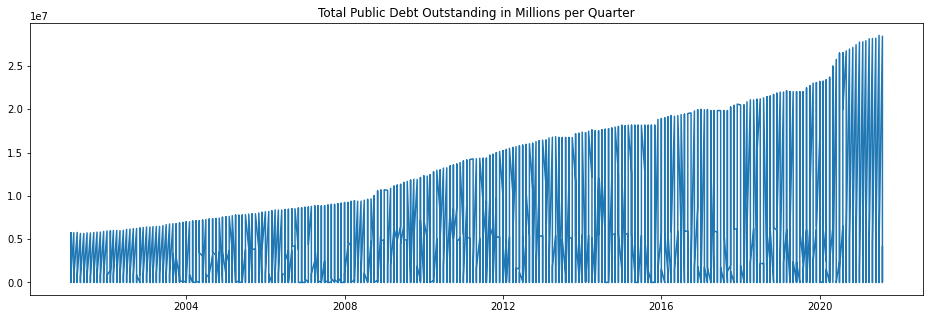

In [624]:
#Graph Fail 1

x = debt_three['record_date']
y = debt_three['total_mil_amt']
fig, ax = plt.subplots(figsize = (16, 5))
ax.plot(x, y)
ax.set_title('Total Public Debt Outstanding in Millions per Quarter')
#graph created using the debt 3 df, 

Text(0.5, 1.0, 'Total Public Debt Outstanding in Millions per Quarter')

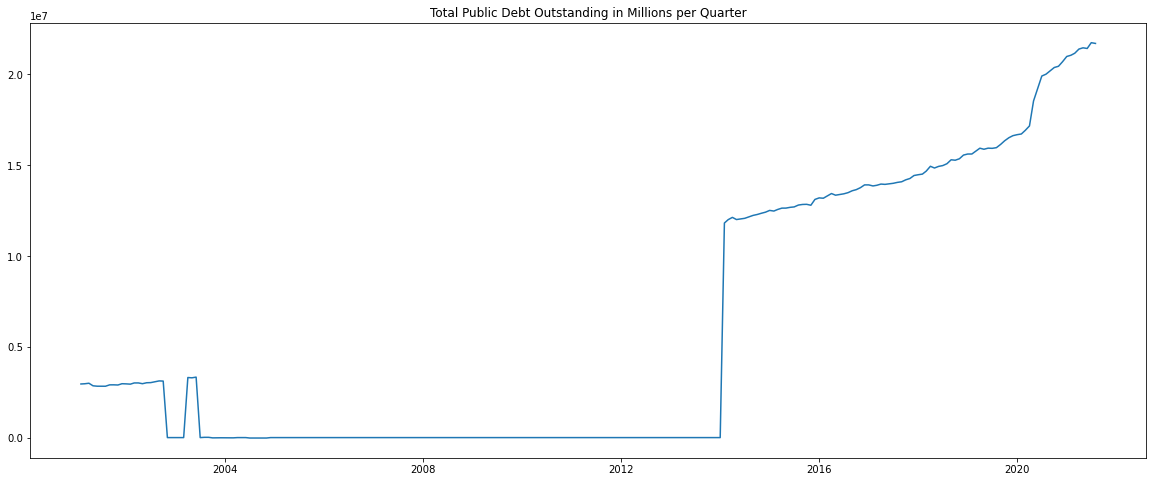

In [625]:
#Graph Fail 2

x = rng #beggining of recorded data to current, taken from record date column
y = TPDO[::-1] #reversed data information to match the rng index
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(x, y)
ax.set_title('Total Public Debt Outstanding in Millions per Quarter')

#final graph messed up due to data inconsistently having data at either 15 or 16 intervals


Context

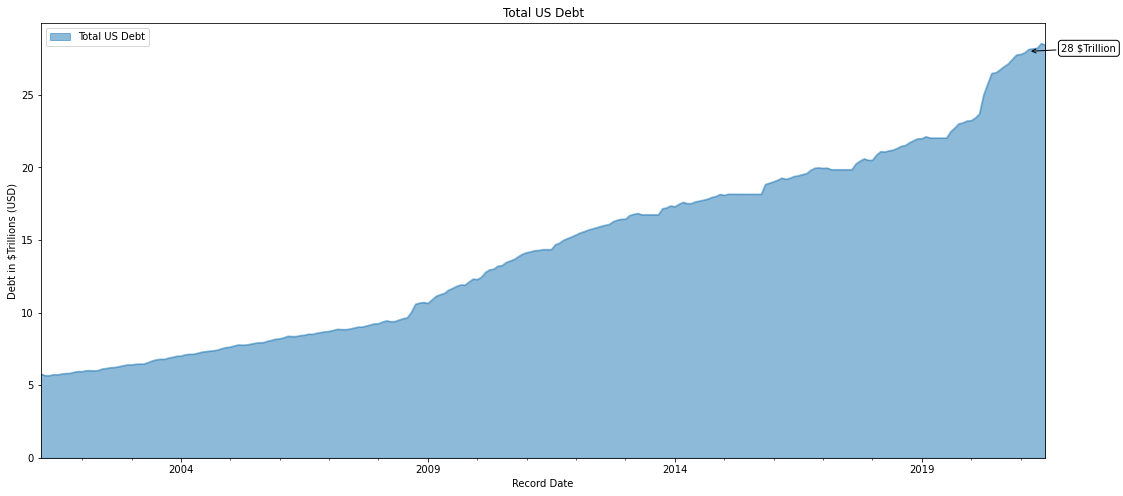

In [626]:
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"]
                                 == "Total Public Debt Outstanding"].total_mil_amt.plot.area(label="Total US Debt", stacked = False)
#Labels
ax.annotate("28 $Trillion", xy = ("2021-03-01",28000000), xycoords='data', xytext=(60, 0), bbox=dict(boxstyle="round", fc="none", ec="black") , 
textcoords='offset points', arrowprops=dict(arrowstyle="->"), ha='center')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ','))) #number reduction instead of $20,000 (in Millions) to $Trillions
plt.ylabel("Debt in $Trillions (USD)")
plt.title("Total US Debt")
plt.xlabel("Record Date")
plt.legend()

Total Marketable Debt vs Total Nonmarketable

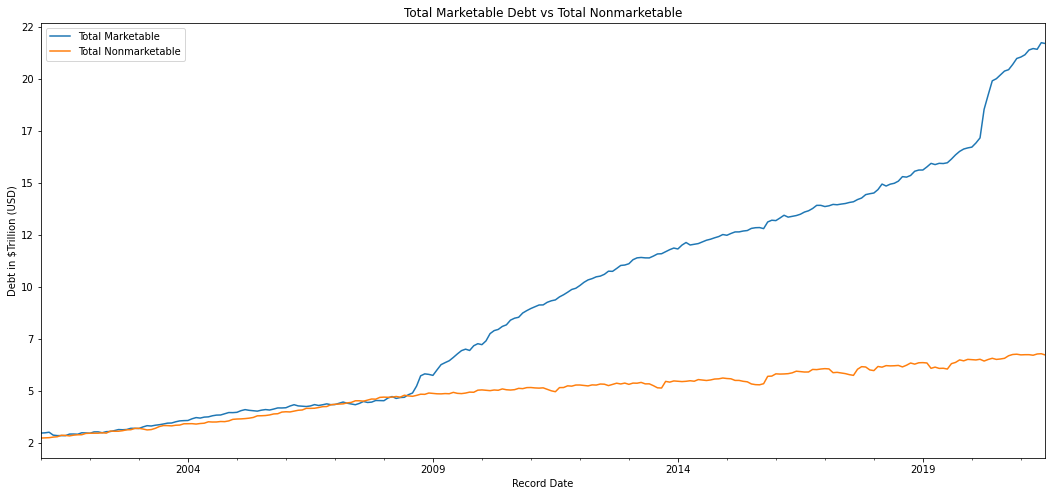

In [627]:
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_type_desc"] == "Total Marketable"].total_mil_amt.plot(label="Total Marketable")
debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"]
                                 == "Total Nonmarketable"].total_mil_amt.plot(label="Total Nonmarketable")
#Labels
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ','))) #number reduction instead of $20,000 (in Millions) to $Trillions
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Total Nonmarketable")
plt.xlabel("Record Date")
plt.legend()

GFC (September 2009)

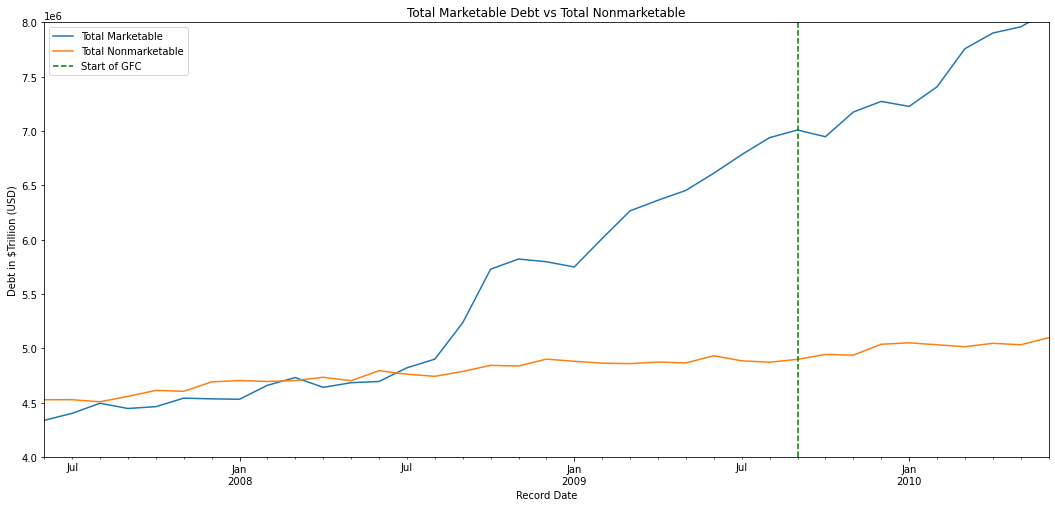

In [628]:
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_type_desc"] == "Total Marketable"].total_mil_amt.plot(label="Total Marketable")
debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"]
                                 == "Total Nonmarketable"].total_mil_amt.plot(label="Total Nonmarketable")
#Labels
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Total Nonmarketable")
plt.xlabel("Record Date")
plt.xlim("2007-06-01", "2010-06-30")
plt.ylim(4000000, 8000000)
plt.axvline(x="2009-09-15", color = 'green', linestyle = "--", label = "Start of GFC")
plt.legend()

Debt was rising before the GFC even started (July 2008)

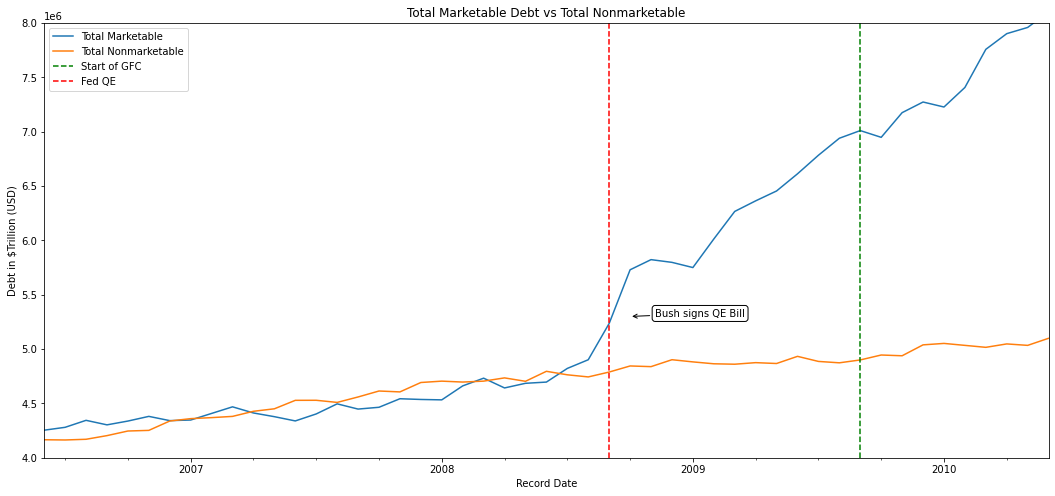

In [629]:
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Marketable"].total_mil_amt.plot(label="Total Marketable")
debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Nonmarketable"].total_mil_amt.plot(label="Total Nonmarketable")
#Labels
ax.annotate("Bush signs QE Bill", xy = ("2008-10-15",5300000), xycoords='data', xytext=(70, 0), bbox=dict(boxstyle="round", fc="none", ec="black"),
textcoords='offset points', arrowprops=dict(arrowstyle="->"), ha='center')
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Total Nonmarketable")
plt.xlabel("Record Date")
plt.xlim("2006-06-01", "2010-06-30")
plt.ylim(4000000, 8000000)
plt.axvline(x="2009-09-15", color = 'green', linestyle = "--", label = "Start of GFC")
plt.axvline(x="2008-09-8", color = 'red', linestyle = "--", label = 'Fed QE')
plt.legend()

Surely after the GFC, the Government has settled some of the debt seeing as the Debt to GDP ratio is 91%

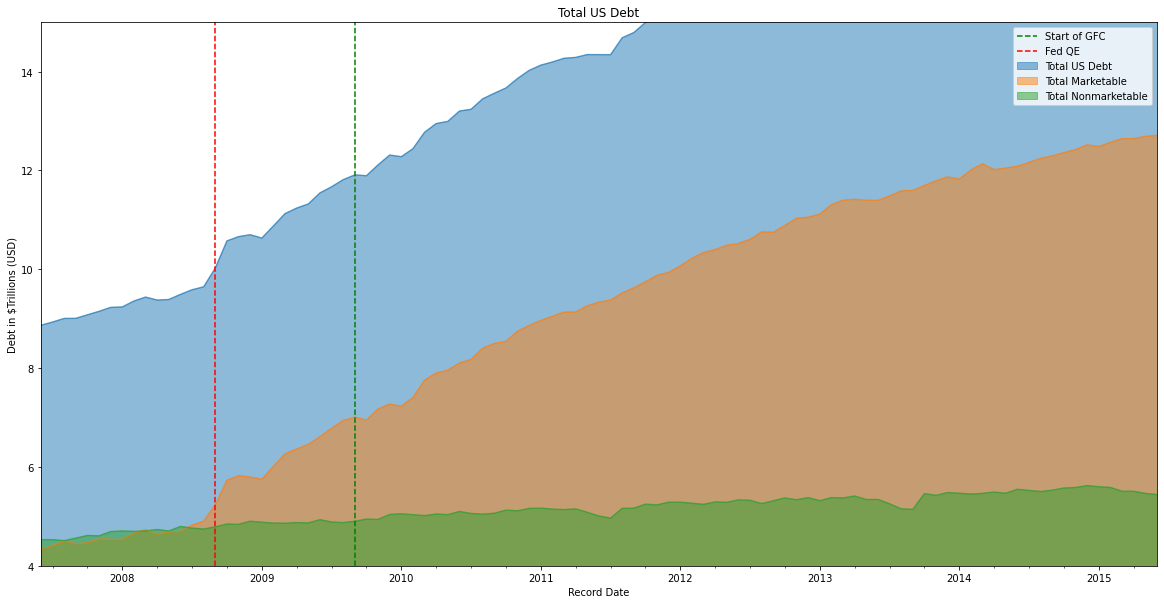

In [653]:
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Public Debt Outstanding"].total_mil_amt.plot.area(label="Total US Debt", stacked = False)
debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Marketable"].total_mil_amt.plot.area(label="Total Marketable", stacked = False)
debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Nonmarketable"].total_mil_amt.plot.area(label="Total Nonmarketable", stacked = False)
#Labels
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ','))) #number reduction instead of $20,000 (in Millions) to $Trillions
plt.ylabel("Debt in $Trillions (USD)")
plt.title("Total US Debt")
plt.xlim("2007-06-01", "2015-06-30") #date limiter
plt.ylim(4000000, 15000000) #scale limiter
plt.xlabel("Record Date")
plt.axvline(x="2009-09-15", color = 'green', linestyle = "--", label = "Start of GFC")
plt.axvline(x="2008-09-8", color = 'red', linestyle = "--", label = 'Fed QE')
plt.legend()

Wrong

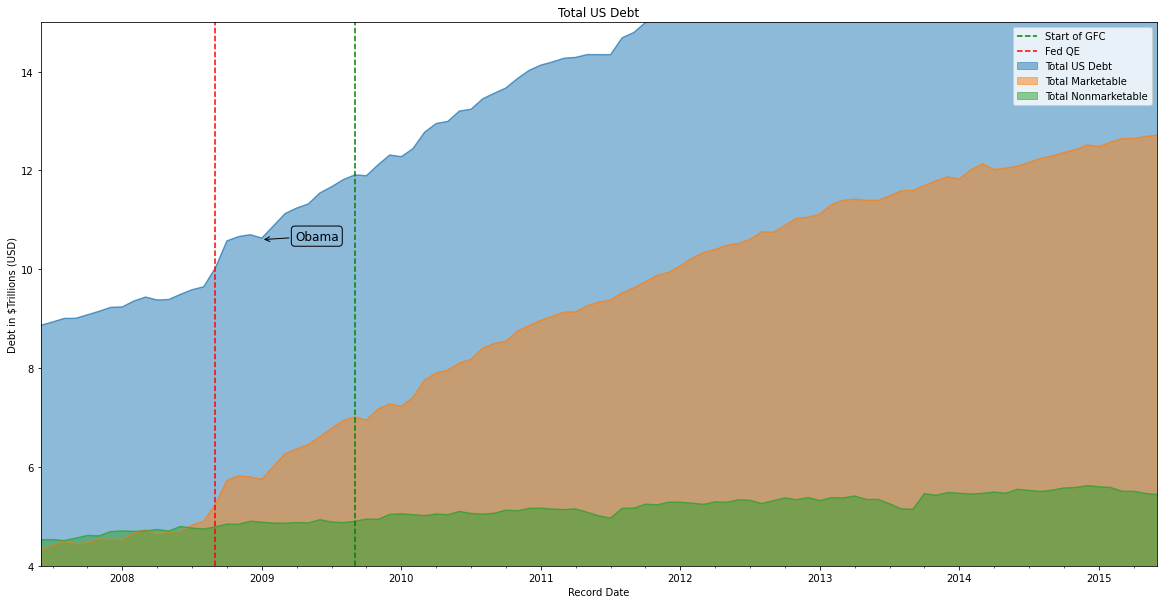

In [657]:
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Public Debt Outstanding"].total_mil_amt.plot.area(label="Total US Debt", stacked = False)
debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Marketable"].total_mil_amt.plot.area(label="Total Marketable", stacked = False)
debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Nonmarketable"].total_mil_amt.plot.area(label="Total Nonmarketable", stacked = False)
#Labels
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ','))) #number reduction instead of $20,000 (in Millions) to $Trillions
plt.ylabel("Debt in $Trillions (USD)")
plt.title("Total US Debt")
plt.xlim("2007-06-01", "2015-06-30") #date limiter
plt.ylim(4000000, 15000000) #scale limiter
plt.xlabel("Record Date")
plt.axvline(x="2009-09-15", color = 'green', linestyle = "--", label = "Start of GFC")
plt.axvline(x="2008-09-8", color = 'red', linestyle = "--", label = 'Fed QE')
ax.annotate("Obama", xy = ("2009-01-31",10600000), xycoords='data', xytext=(55, 0), bbox=dict(boxstyle="round", fc="none", ec="black"),
textcoords='offset points', arrowprops=dict(arrowstyle="->"), ha='center', size = 12)
plt.legend()

Obamas Term

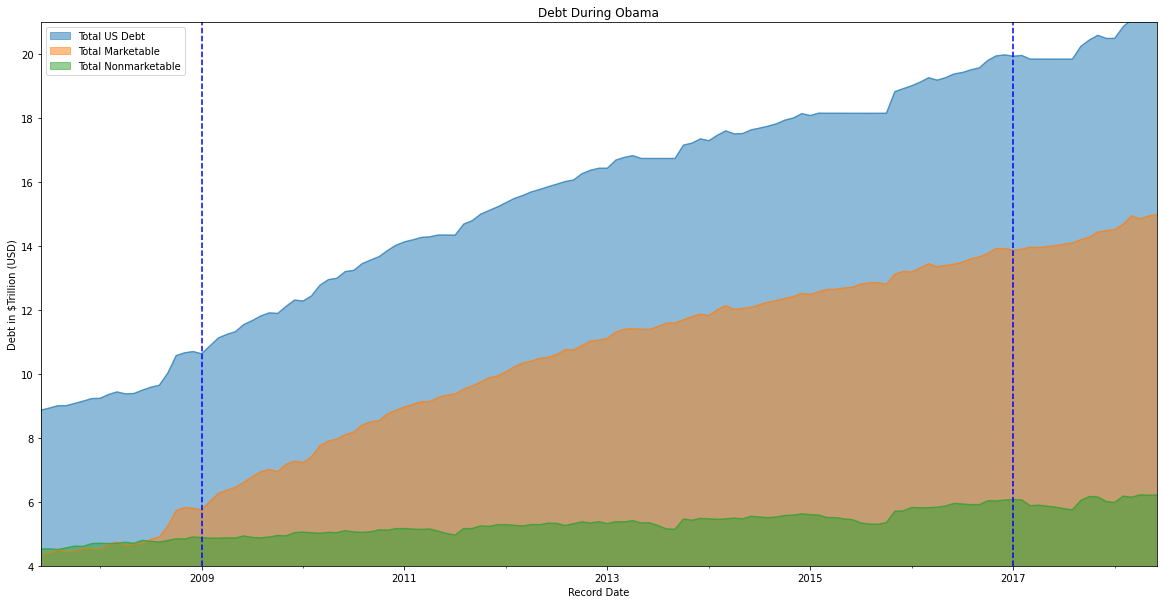

In [662]:
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Public Debt Outstanding"].total_mil_amt.plot.area(label="Total US Debt", stacked = False)
debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Marketable"].total_mil_amt.plot.area(label="Total Marketable", stacked = False)
debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Nonmarketable"].total_mil_amt.plot.area(label="Total Nonmarketable", stacked = False)
#Labels
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ','))) #number reduction instead of $20,000 (in Millions) to $Trillions
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Debt During Obama")
plt.xlabel("Record Date")
plt.xlim("2007-06-01", "2018-06-30")
plt.ylim(4000000, 21000000)

plt.axvline(x="2009-01-31", color = 'blue', linestyle = "--")
plt.axvline(x="2017-01-31", color = 'blue', linestyle = "--")
plt.legend()

With the Debt to GDP Ratio at 104% upon leaving Office, a new face must make the changes.

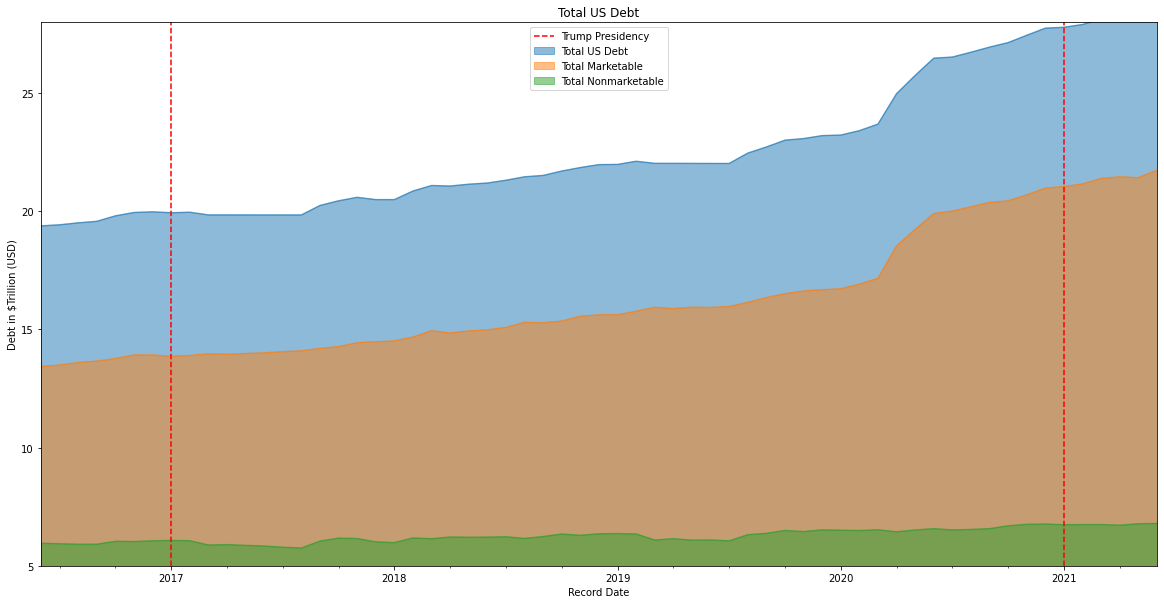

In [668]:
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Public Debt Outstanding"].total_mil_amt.plot.area(label="Total US Debt", stacked = False)
debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Marketable"].total_mil_amt.plot.area(label="Total Marketable", stacked = False)
debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Nonmarketable"].total_mil_amt.plot.area(label="Total Nonmarketable", stacked = False)
#Labels
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ','))) #number reduction instead of $20,000 (in Millions) to $Trillions
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total US Debt")
plt.xlabel("Record Date")
plt.xlim("2016-06-01", "2021-06-30")
plt.ylim(5000000, 28000000)
plt.axvline(x="2017-01-31", color = 'red', linestyle = "--", label = "Trump Presidency")
plt.axvline(x="2021-01-31", color = 'red', linestyle = "--")
plt.legend()

I mean that looks better than the previous Graph right

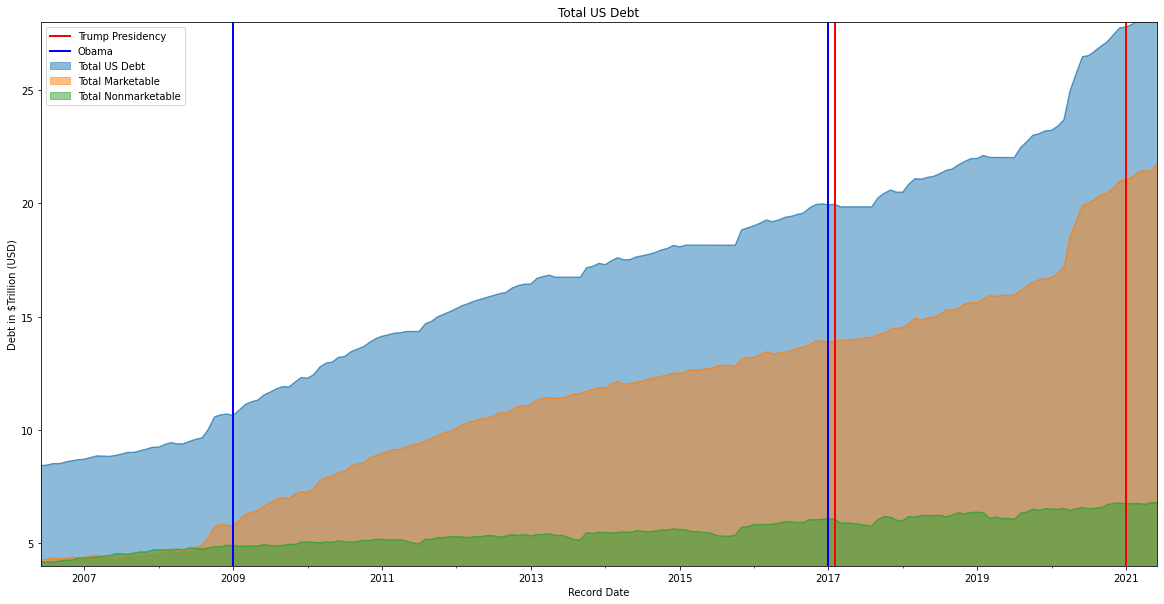

In [669]:
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Public Debt Outstanding"].total_mil_amt.plot.area(label="Total US Debt", stacked = False)
debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Marketable"].total_mil_amt.plot.area(label="Total Marketable", stacked = False)
debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Nonmarketable"].total_mil_amt.plot.area(label="Total Nonmarketable", stacked = False)
#Labels
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ','))) #number reduction instead of $20,000 (in Millions) to $Trillions
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total US Debt")
plt.xlabel("Record Date")
plt.xlim("2006-06-01", "2021-06-30")
plt.ylim(4000000, 28000000)
plt.axvline(x="2017-01-31", color = 'blue', linestyle = "-", linewidth = 2)
plt.axvline(x="2017-02-01", color = 'red', linestyle = "-", linewidth = 2)
plt.axvline(x="2021-01-31", color = 'red', linestyle = "-", label = "Trump Presidency", linewidth = 2)
plt.axvline(x="2009-01-31", color = 'blue', linestyle = "-", label = "Obama", linewidth = 2)
plt.legend()

No Longer Needed Graphs

In [ ]:
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Marketable"].total_mil_amt.plot(label="Total Marketable")
debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"] == "Total Nonmarketable"].total_mil_amt.plot(label="Total Nonmarketable")
#Labels
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ','))) #number reduction instead of $20,000 (in Millions) to $Trillions
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Total Nonmarketable")
plt.xlabel("Record Date")
plt.xlim("2007-06-01", "2015-06-30")
plt.ylim(4000000, 10000000)

plt.axvline(x="2009-09-15", color = 'green', linestyle = "--", label = "Start of GFC")
plt.axvline(x="2008-09-8", color = 'red', linestyle = "--", label = 'Fed QE')
plt.legend()

In [ ]:
#Obama Inauguration

ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_type_desc"] == "Total Marketable"].total_mil_amt.plot(label="Total Marketable")

ax.annotate("Obama", xy = ("2009-01-31",5700000), xycoords='data', xytext=(55, 0), bbox=dict(boxstyle="round", fc="none", ec="black") , textcoords='offset points', arrowprops=dict(arrowstyle="->"), ha='center', size = 10)

debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"]
                                 == "Total Nonmarketable"].total_mil_amt.plot(label="Total Nonmarketable")

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ','))) #number reduction instead of $20,000 (in Millions) to $Trillions
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Total Nonmarketable")
plt.xlabel("Record Date")
plt.xlim("2007-06-01", "2015-06-30")
plt.ylim(4000000, 10000000)

plt.axvline(x="2009-09-15", color = 'green', linestyle = "--", label = "Start of GFC")
plt.axvline(x="2008-09-8", color = 'red', linestyle = "--", label = 'Fed QE')
plt.legend()

In [ ]:
#Obamas Term

ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_type_desc"] == "Total Marketable"].total_mil_amt.plot(label="Total Marketable")


debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"]
                                 == "Total Nonmarketable"].total_mil_amt.plot(label="Total Nonmarketable")

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ','))) #number reduction instead of $20,000 (in Millions) to $Trillions
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Total Nonmarketable")
plt.xlabel("Record Date")
plt.xlim("2007-06-01", "2018-06-30")
plt.ylim(4000000, 17000000)

plt.axvline(x="2009-01-31", color = 'blue', linestyle = "--")
plt.axvline(x="2017-01-31", color = 'blue', linestyle = "--")
plt.legend()

In [ ]:
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_type_desc"] == "Total Marketable"].total_mil_amt.plot(label="Total Marketable")


debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"]
                                 == "Total Nonmarketable"].total_mil_amt.plot(label="Total Nonmarketable")

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ','))) #number reduction instead of $20,000 (in Millions) to $Trillions
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Total Nonmarketable")
plt.xlabel("Record Date")
plt.xlim("2015-06-01", "2021-06-30")
plt.ylim(5000000, 23000000)

plt.axvline(x="2017-01-31", color = 'red', linestyle = "--", label = "Trump Presidency")
plt.axvline(x="2021-01-31", color = 'red', linestyle = "--")
plt.legend()

In [ ]:
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_type_desc"] == "Total Marketable"].total_mil_amt.plot(label="Total Marketable")


debt_df.set_index("record_date")[debt_df.set_index("record_date")["security_type_desc"]
                                 == "Total Nonmarketable"].total_mil_amt.plot(label="Total Nonmarketable")

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ','))) #number reduction instead of $20,000 (in Millions) to $Trillions
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Total Nonmarketable")
plt.xlabel("Record Date")
plt.xlim("2006-06-01", "2021-06-30")
plt.ylim(4000000, 23000000)

plt.axvline(x="2017-01-31", color = 'blue', linestyle = "-", linewidth = 2)
plt.axvline(x="2017-02-01", color = 'red', linestyle = "-", linewidth = 2)
plt.axvline(x="2021-01-31", color = 'red', linestyle = "-", label = "Trump Presidency", linewidth = 2)
plt.axvline(x="2009-01-31", color = 'blue', linestyle = "-", label = "Obama", linewidth = 2)

plt.legend()

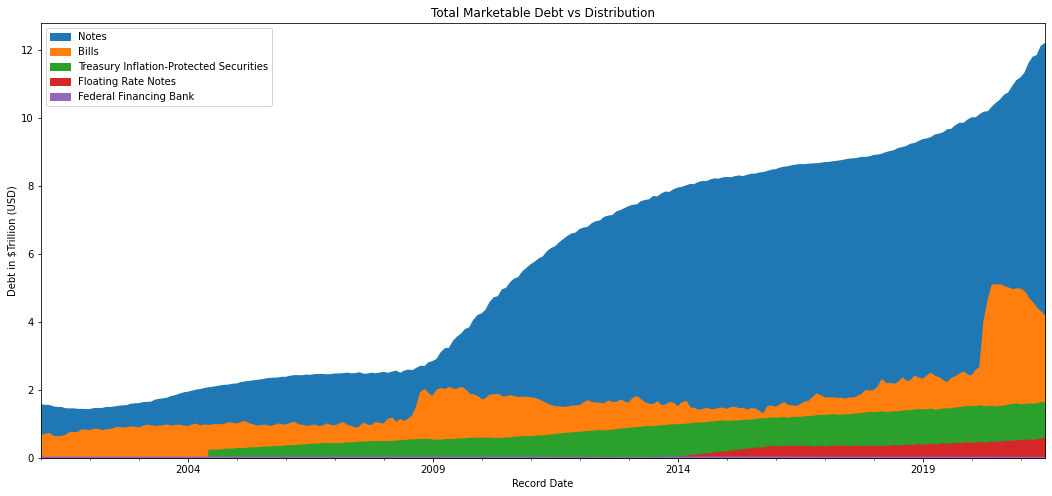

In [636]:
#Total Distribution Graph


#Class Descriptions
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Notes"].total_mil_amt.plot.area(label="Notes")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Bills"].total_mil_amt.plot.area(label="Bills")   
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Treasury Inflation-Protected Securities"].total_mil_amt.plot.area(label="Treasury Inflation-Protected Securities")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Floating Rate Notes"].total_mil_amt.plot.area(label="Floating Rate Notes")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Federal Financing Bank"].total_mil_amt.plot.area(label="Federal Financing Bank")



#Labels    
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Distribution")
plt.xlabel("Record Date")



plt.legend()

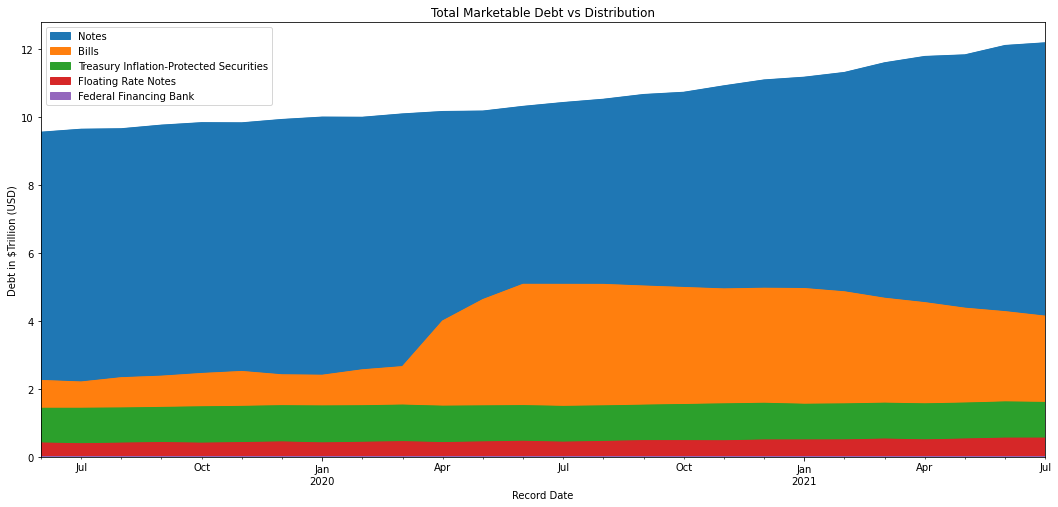

In [637]:
#Total Marketable Graph

#Total Marketable Debt
# ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
#     "security_type_desc"] == "Total Marketable"].total_mil_amt.plot(label="Total Marketable")


#Class Descriptions
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Notes"].total_mil_amt.plot.area(label="Notes")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Bills"].total_mil_amt.plot.area(label="Bills")   
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Treasury Inflation-Protected Securities"].total_mil_amt.plot.area(label="Treasury Inflation-Protected Securities")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Floating Rate Notes"].total_mil_amt.plot.area(label="Floating Rate Notes")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Federal Financing Bank"].total_mil_amt.plot.area(label="Federal Financing Bank")



#Labels    
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Distribution")
plt.xlabel("Record Date")
plt.xlim("2019-06-01", "2021-07-31")


plt.legend() 

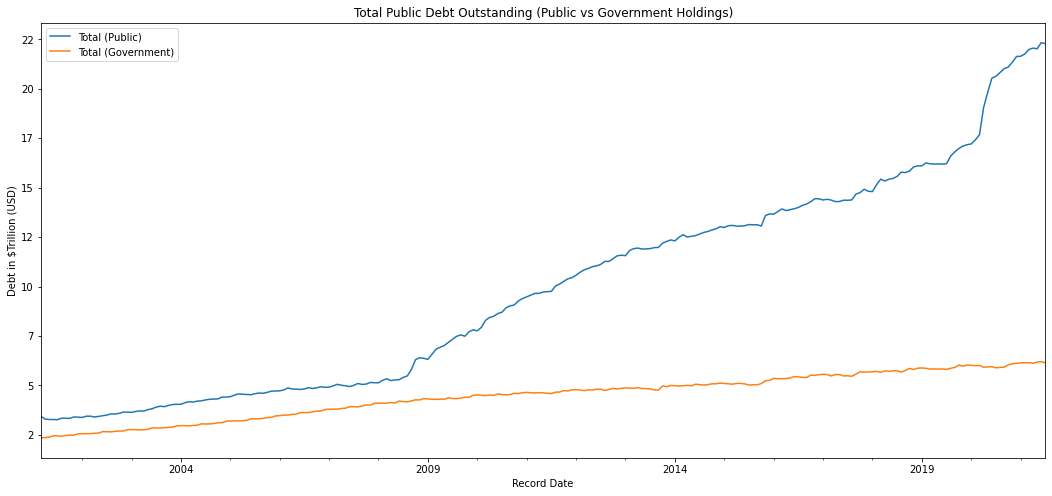

In [638]:
#Total Public Debt Outstanding

ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_type_desc"] == "Total Public Debt Outstanding"].debt_held_public_mil_amt.plot(label="Total (Public)")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_type_desc"] == "Total Public Debt Outstanding"].intragov_hold_mil_amt.plot(label="Total (Government)")


ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Public Debt Outstanding (Public vs Government Holdings)")
plt.xlabel("Record Date")

plt.legend()   

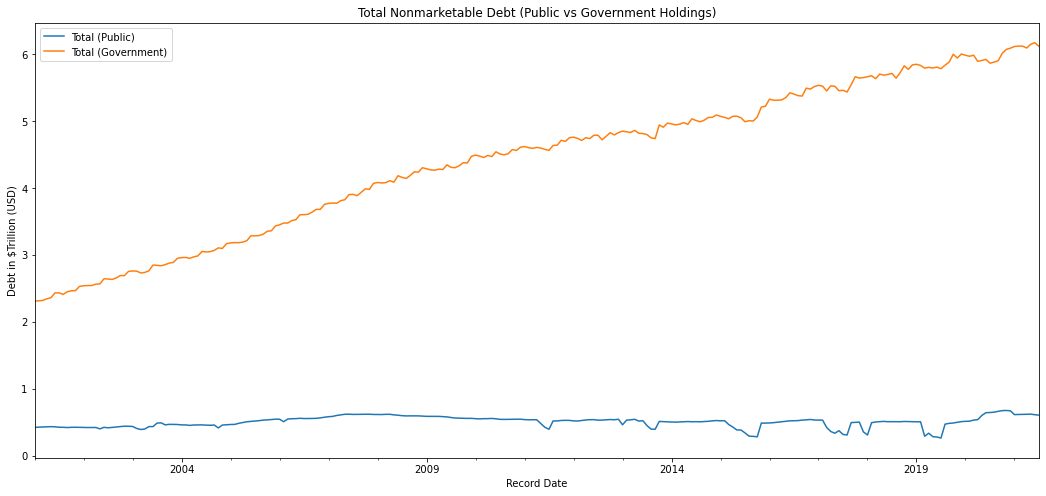

In [639]:
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_type_desc"] == "Total Nonmarketable"].debt_held_public_mil_amt.plot(label="Total (Public)")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_type_desc"] == "Total Nonmarketable"].intragov_hold_mil_amt.plot(label="Total (Government)")

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Nonmarketable Debt (Public vs Government Holdings)")
plt.xlabel("Record Date")

plt.legend()

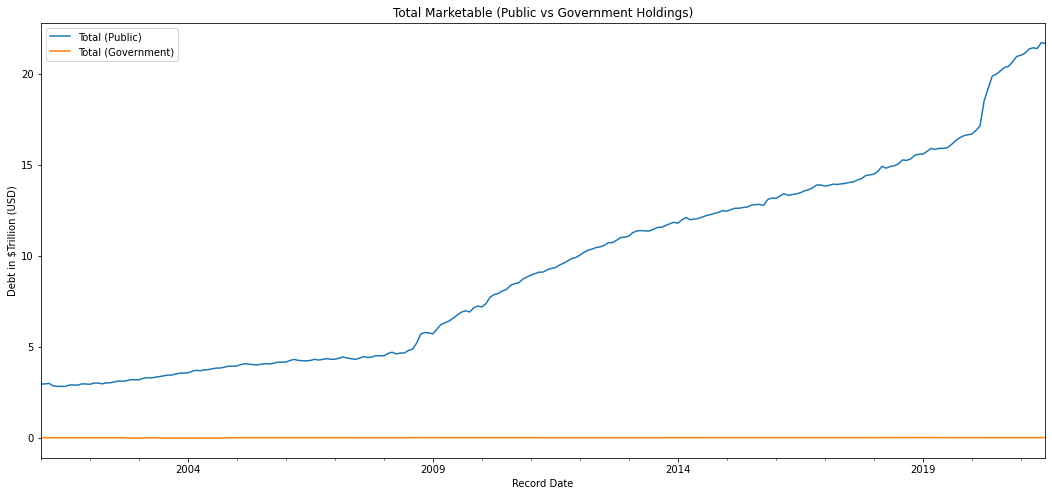

In [640]:
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_type_desc"] == "Total Marketable"].debt_held_public_mil_amt.plot(label="Total (Public)")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_type_desc"] == "Total Marketable"].intragov_hold_mil_amt.plot(label="Total (Government)")

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable (Public vs Government Holdings)")
plt.xlabel("Record Date")

plt.legend()

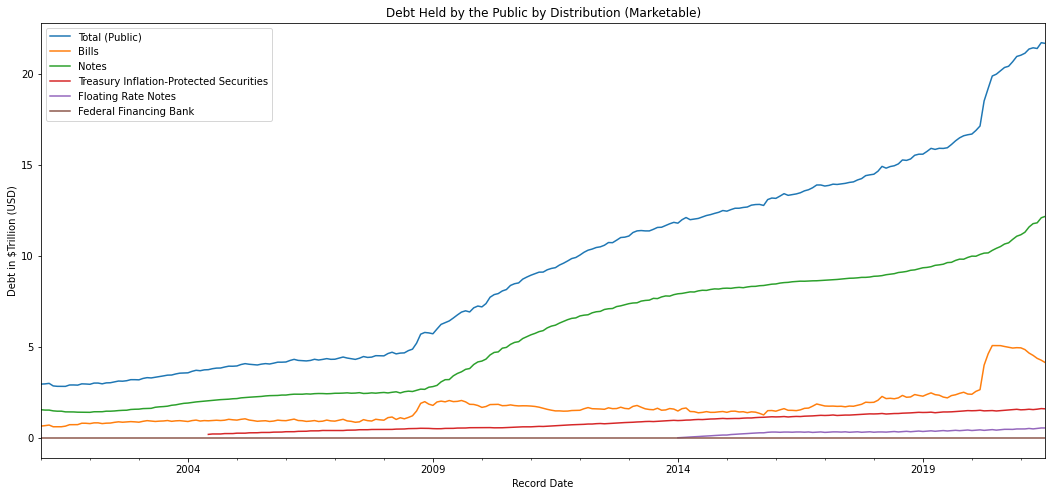

In [641]:

#Debt Held by the Public Graph
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_type_desc"] == "Total Marketable"].debt_held_public_mil_amt.plot(label="Total (Public)")

#Class Descriptions    
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Bills"].debt_held_public_mil_amt.plot(label="Bills")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Notes"].debt_held_public_mil_amt.plot(label="Notes")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Treasury Inflation-Protected Securities"].debt_held_public_mil_amt.plot(label="Treasury Inflation-Protected Securities")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Floating Rate Notes"].debt_held_public_mil_amt.plot(label="Floating Rate Notes")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Federal Financing Bank"].debt_held_public_mil_amt.plot(label="Federal Financing Bank")



ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Debt Held by the Public by Distribution (Marketable)")
plt.xlabel("Record Date")

plt.legend()

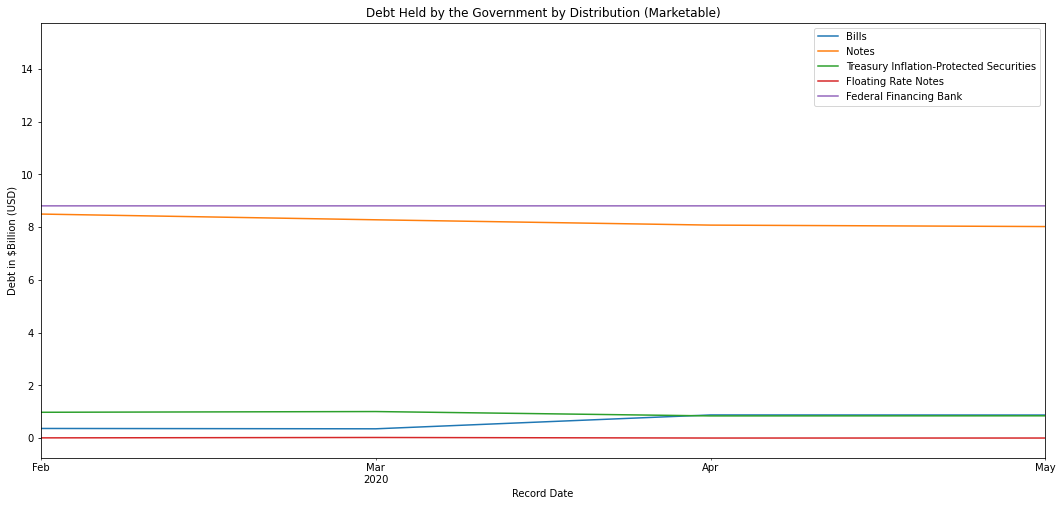

In [642]:
# #Debt Held by the Government Graph
# ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
#     "security_type_desc"] == "Total Marketable"].intragov_hold_mil_amt.plot(label="Total (Government)")

#Class Descriptions    
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Bills"].intragov_hold_mil_amt.plot(label="Bills")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Notes"].intragov_hold_mil_amt.plot(label="Notes")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Treasury Inflation-Protected Securities"].intragov_hold_mil_amt.plot(label="Treasury Inflation-Protected Securities")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Floating Rate Notes"].intragov_hold_mil_amt.plot(label="Floating Rate Notes")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Federal Financing Bank"].intragov_hold_mil_amt.plot(label="Federal Financing Bank")


#Labels
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
plt.rcParams['figure.figsize'] = (20,10)

plt.ylabel("Debt in $Billion (USD)")
plt.title("Debt Held by the Government by Distribution (Marketable)")
plt.xlabel("Record Date")
plt.xlim("2020-02-01", "2020-05-01")

plt.legend()


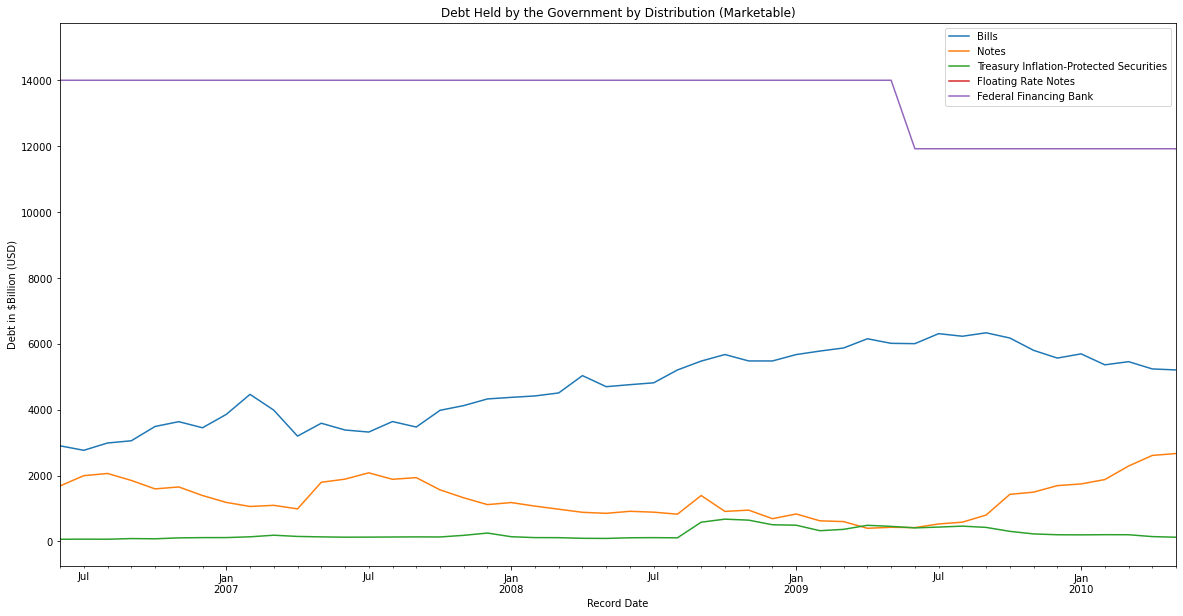

In [643]:
#Debt Held by the Government Graph
# ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
#     "security_type_desc"] == "Total Marketable"].intragov_hold_mil_amt.plot(label="Total (Government)")

#Class Descriptions    
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Bills"].intragov_hold_mil_amt.plot(label="Bills")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Notes"].intragov_hold_mil_amt.plot(label="Notes")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Treasury Inflation-Protected Securities"].intragov_hold_mil_amt.plot(label="Treasury Inflation-Protected Securities")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Floating Rate Notes"].intragov_hold_mil_amt.plot(label="Floating Rate Notes")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Federal Financing Bank"].intragov_hold_mil_amt.plot(label="Federal Financing Bank")


#Labels
plt.rcParams['figure.figsize'] = (20,10)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("Debt in $Billion (USD)")
plt.title("Debt Held by the Government by Distribution (Marketable)")
plt.xlabel("Record Date")
plt.xlim("2006-06-01", "2010-05-31")

plt.legend()

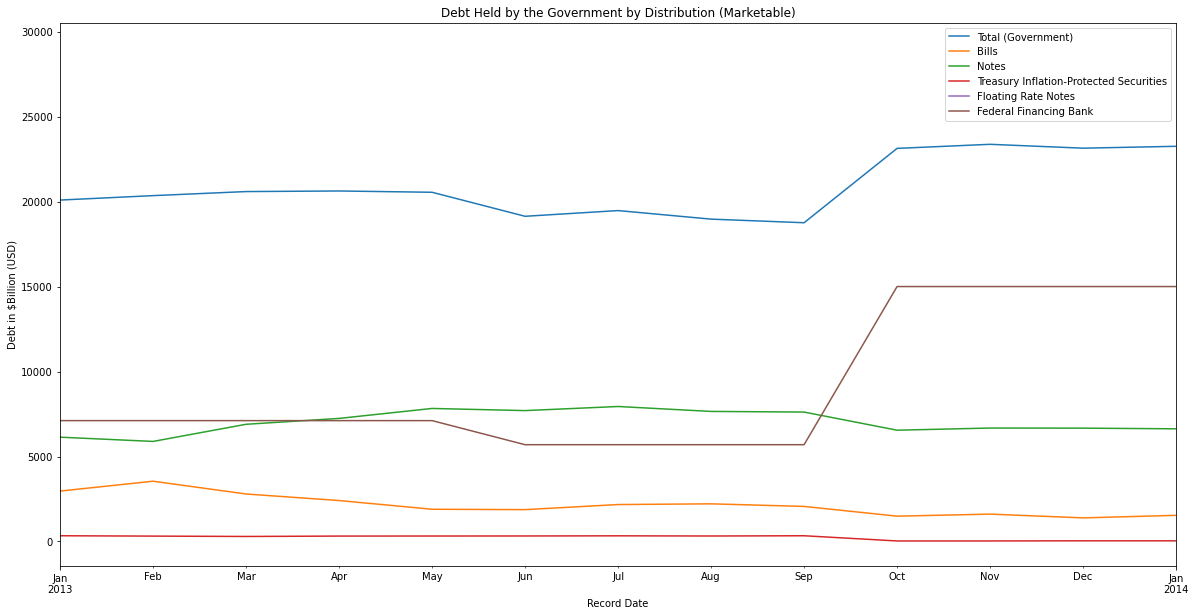

In [644]:
#Debt Held by the Government Graph
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_type_desc"] == "Total Marketable"].intragov_hold_mil_amt.plot(label="Total (Government)")

#Class Descriptions    
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Bills"].intragov_hold_mil_amt.plot(label="Bills")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Notes"].intragov_hold_mil_amt.plot(label="Notes")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Treasury Inflation-Protected Securities"].intragov_hold_mil_amt.plot(label="Treasury Inflation-Protected Securities")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Floating Rate Notes"].intragov_hold_mil_amt.plot(label="Floating Rate Notes")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Federal Financing Bank"].intragov_hold_mil_amt.plot(label="Federal Financing Bank")


#Labels
plt.rcParams['figure.figsize'] = (20,10)
# ax.get_yaxis().set_major_formatter(
# matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("Debt in $Billion (USD)")
plt.title("Debt Held by the Government by Distribution (Marketable)")
plt.xlabel("Record Date")
plt.xlim("2013-01-01", "2014-01-01")

plt.legend()

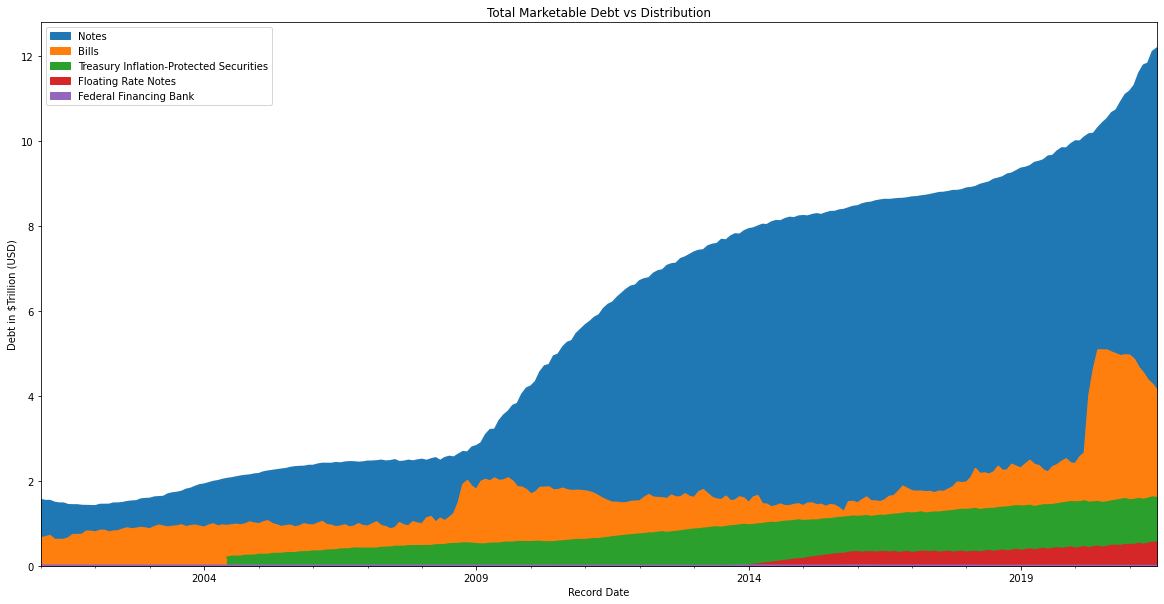

In [645]:
#Total Marketable Graph

#Total Marketable Debt
# ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
#     "security_type_desc"] == "Total Marketable"].total_mil_amt.plot(label="Total Marketable")


#Class Descriptions
ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Notes"].total_mil_amt.plot.area(label="Notes")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Bills"].total_mil_amt.plot.area(label="Bills")   
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Treasury Inflation-Protected Securities"].total_mil_amt.plot.area(label="Treasury Inflation-Protected Securities")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Floating Rate Notes"].total_mil_amt.plot.area(label="Floating Rate Notes")
debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Federal Financing Bank"].total_mil_amt.plot.area(label="Federal Financing Bank")



#Labels    
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Distribution")
plt.xlabel("Record Date")
# plt.xlim("2007-01-01", "2007-06-01")

plt.legend()  

ConversionError: Failed to convert value(s) to axis units: array([<AxesSubplot:xlabel='record_date'>], dtype=object)

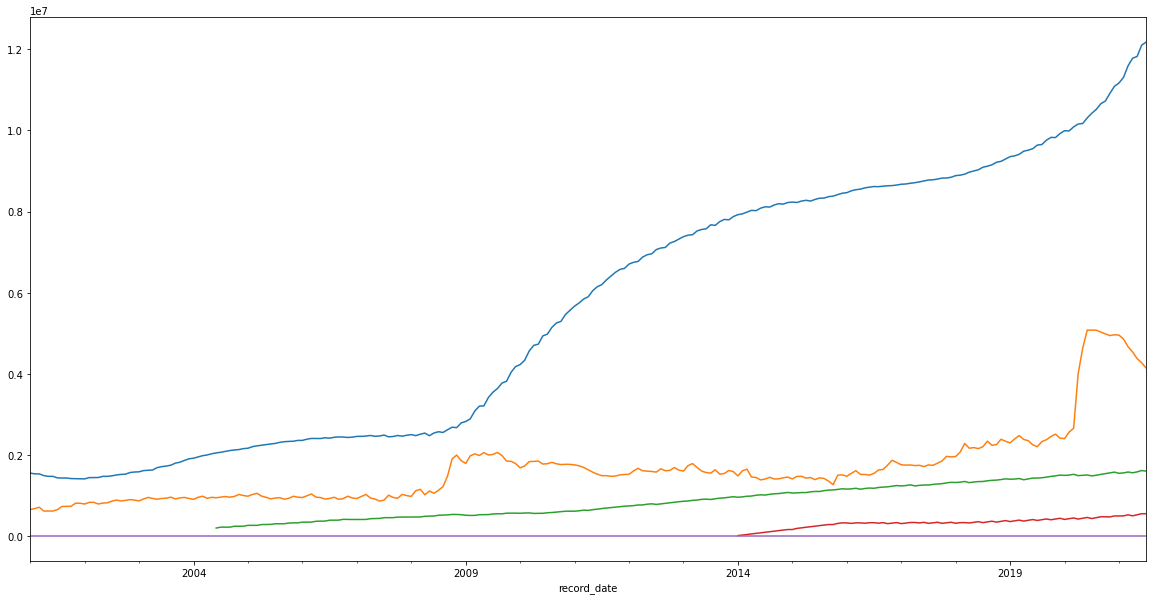

In [646]:
#Total Marketable Graph

#Total Marketable Debt
# ax = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
#     "security_type_desc"] == "Total Marketable"].total_mil_amt.plot(label="Total Marketable")


#Debt Held by Public
ax1 = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Notes"].debt_held_public_mil_amt.plot(label="Notes")
ax2 = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Bills"].debt_held_public_mil_amt.plot(label="Bills")   
ax3 = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Treasury Inflation-Protected Securities"].debt_held_public_mil_amt.plot(label="Treasury Inflation-Protected Securities")
ax4 = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Floating Rate Notes"].debt_held_public_mil_amt.plot(label="Floating Rate Notes")
ax5 = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Federal Financing Bank"].debt_held_public_mil_amt.plot(label="Federal Financing Bank")

plt.plot(ax1, ax2, ax3, ax4, ax5)

#Debt Held by Government
plt.subplot(2, 2, 1)
ax6 = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Notes"].intragov_hold_mil_amt.plot(label="Notes")
ax7 = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Bills"].intragov_hold_mil_amt.plot(label="Bills")   
ax8 = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Treasury Inflation-Protected Securities"].intragov_hold_mil_amt.plot(label="Treasury Inflation-Protected Securities")
ax9 = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Floating Rate Notes"].intragov_hold_mil_amt.plot(label="Floating Rate Notes")
ax10 = debt_df.set_index("record_date")[debt_df.set_index("record_date")[
    "security_class_desc"] == "Federal Financing Bank"].intragov_hold_mil_amt.plot(label="Federal Financing Bank")



#Labels    
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
plt.ylabel("Debt in $Trillion (USD)")
plt.title("Total Marketable Debt vs Distribution")
plt.xlabel("Record Date")
plt.xlim("2008-01-01", "2008-06-01")
plt.ylim

plt.legend()  